5. Comparisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,12)

In [3]:
world = pd.read_pickle("data/world.3.grouped.pkl")

In [4]:
world.dtypes

country                object
region                 object
happiness_rank          int64
happiness_score       float64
standard_error        float64
economy               float64
family                float64
health                float64
freedom               float64
gov_trust             float64
generosity            float64
development_level      object
happ_score_types     category
rank_types           category
health_types         category
dtype: object

In [5]:
world.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,gov_trust,generosity,development_level,happ_score_types,rank_types,health_types
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,developed,high,high,high
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,developed,high,high,high
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,developed,high,high,high
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,developed,high,high,high
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,developed,high,high,high


In [6]:
from ipywidgets import interact, fixed

Multiple group counts

In [7]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [14]:
score_by_health_rank = pivot_count(world, "happ_score_types","health_types", "happiness_score")
score_by_health_rank

health_types,very low,low,medium,high
happ_score_types,,,,
high,NaN,5.0,6.0,29.0
medium,5.0,9.0,15.0,10.0
low,7.0,15.0,16.0,1.0
very low,28.0,10.0,2.0,NaN


In [22]:
def means_by_category(col_group, col_calc):
    world_no_outliers = world[world[col_calc]<world[col_calc].quantile(0.99)]
    world_no_outliers.groupby(col_group)[col_calc].mean().plot.barh()   
    plt.ylabel(col_group)
    plt.xlabel('Mean values for variable {}'.format(col_calc))
    plt.show()

In [23]:
numerical_variables = world.select_dtypes(np.number).columns
categorical_variables = world.select_dtypes(['object', 'category']).columns
columns_type = [col for col in world.columns if col.endswith("_type")]

In [24]:
interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('country', 'region', 'development_level', 'ha…

It is clear that more developed nations average higher scores, and regions with more developed contries (Western Europe, North America, etc.) have higher happiness scores.

Mean by Multiple Groups

In [26]:
def pivot_mean(rows, columns, calc_field):
    df_pivot = world.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [30]:
pivot_mean("health_types","happ_score_types", "happiness_score")

happ_score_types,very low,low,medium,high
health_types,,,,
high,NaN,5.268000,4.792800,3.910897
medium,6.373000,5.752562,4.881667,4.171167
low,6.667900,5.726667,4.968667,4.028400
very low,7.026929,5.803571,4.979400,NaN


Correlations

In [31]:
world.corr()

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,gov_trust,generosity
happiness_rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
happiness_score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
standard_error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439
economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
gov_trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


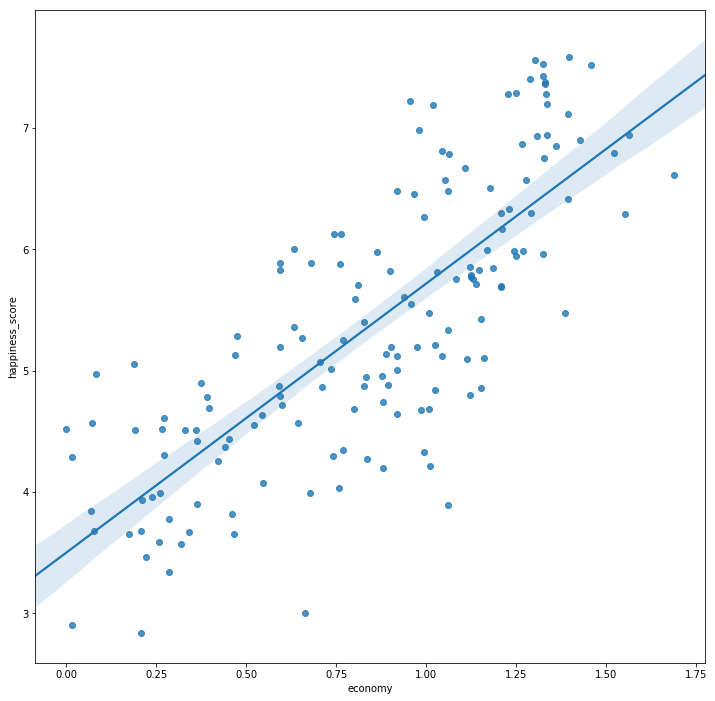

In [32]:
sns.regplot("economy", "happiness_score", data=world);

Economy and happiness scores have a very significant, positive correlation.

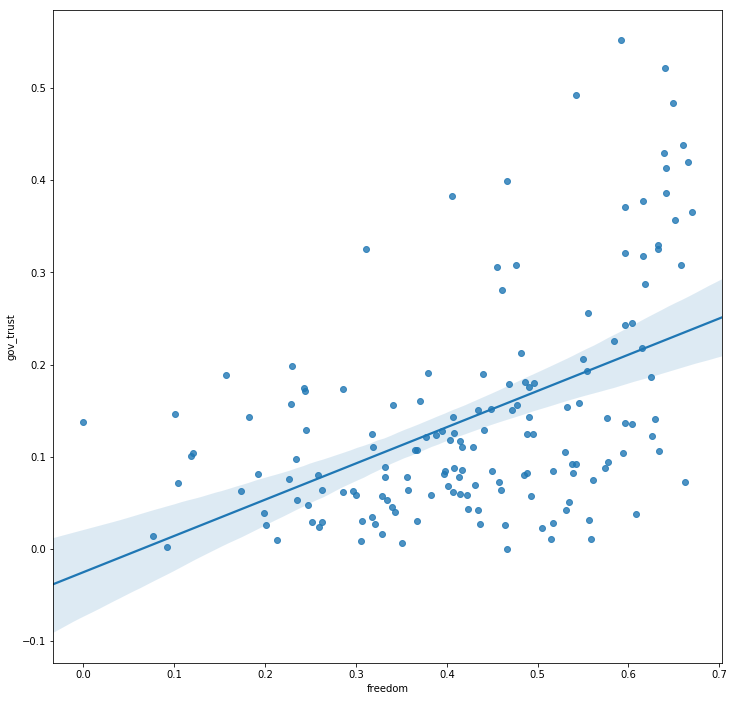

In [33]:
sns.regplot("freedom", "gov_trust", data=world);

As expected, countries with a greater perception of their own freedom are more likely to trust their government.

Comparisons Conclusions

    More developed countries have higher happiness scores likely due to a higher quality of life from having better 
    economies, superior healthcare, and more political freedom.
    The happiest region collectively is North America, while the least happiest is Sub-Saharan Africa.
    The region with the most amount of happy countries is Western Europe. 
    Based on the correlation with happiness scores, economy is the most valuable variable that contributes to 
    happiness, then followed in order by family, health, freedom, government trust, then generosity.